In [2]:
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

# Newton-Raphson method
def newton_raphson(x0, tol=1e-5, max_iter=100):
    print(f"{'Iter':<5} {'x':>12} {'f(x)':>15}")
    x_vals = [x0]  # For plotting
    f_vals = [f(x0)]

    for i in range(1, max_iter + 1):
        fx = f(x0)
        dfx = df(x0)

        if abs(dfx) < 1e-10:
            print("Derivative too small; Method fails.")
            return None

        x1 = x0 - fx / dfx
        print(f"{i:<5} {x1:12.6f} {f(x1):15.6f}")

        x_vals.append(x1)
        f_vals.append(f(x1))

        if abs(x1 - x0) < tol:
            print(f"\nRoot found: x = {x1:.6f}")
            plot_newton(x_vals, f)
            return x1

        x0 = x1

    print("Did not converge within the max iterations.")
    plot_newton(x_vals, f)
    return None

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Enter initial guess:  2.5


Iter             x            f(x)
1         2.164179        0.807945
2         2.097135        0.028882
3         2.094555        0.000042
4         2.094551        0.000000

Root found: x = 2.094551


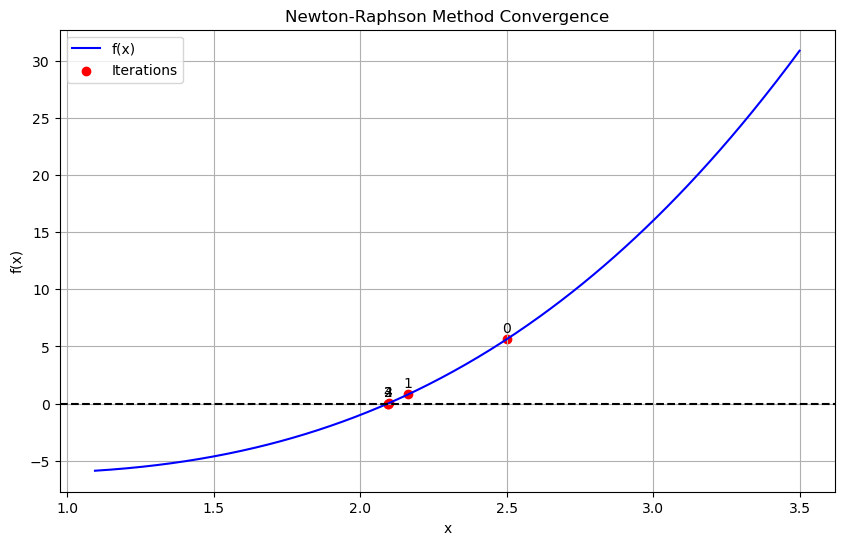

In [4]:
def plot_newton(x_vals, f):
    x_range = np.linspace(min(x_vals)-1, max(x_vals)+1, 400)
    y_range = f(x_range)

    plt.figure(figsize=(10, 6))
    plt.plot(x_range, y_range, label='f(x)', color='blue')
    plt.axhline(0, color='black', linestyle='--')
    plt.scatter(x_vals, [f(x) for x in x_vals], color='red', label='Iterations')
    for i, (x, y) in enumerate(zip(x_vals, [f(x) for x in x_vals])):
        plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,5), ha='center')

    plt.title("Newton-Raphson Method Convergence")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main
try:
    x0 = float(input("Enter initial guess: "))
    newton_raphson(x0)
except ValueError:
    
    print("Invalid input.")